In [2]:
#!/usr/bin/env python3
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)

from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "serif",
        "transition": "zoom",
        "start_slideshow_at": "selected",  
        "header": "<h1>Hello</h1>",
        "footer": "<h3>World!</h3>",
        "enable_chalkboard": True
     }
)


{'theme': 'serif',
 'transition': 'zoom',
 'start_slideshow_at': 'selected',
 'header': '<h1>Hello</h1>',
 'footer': '<h3>World!</h3>',
 'enable_chalkboard': True}

# Acceso a datos de radares meteorológicos usando Python

## Alfonso Ladino 
### Phd. Student
### University of Illinois at Urbana Champaing
#### Octubre de 2021

# Agenda

### 1. Red nacional radares meteorologicos de Colombia 
### 2. Disponibilidad de los datos de radar en AWS
### 3. Manipulación de datos de radar usando Python - PyArt
### 4. Applicaciones de los radares meteorológicos

## 1. Red nacional radares meteorologicos de Colombia 


In [ ]:
import folium
from folium import plugins
from fastkml.kml import KML
import pandas as pd
import base64
from folium import IFrame

In [ ]:
df_radares = pd.read_csv('data/radar_locations.csv')

In [ ]:
min_lon, max_lon, min_lat, max_lat = -90, -72, -1, 14

map_ = folium.Map(location=[7, -74], tiles='Stamen Terrain',
                  zoom_start = 6, 
                  min_lat=min_lat, 
                  max_lat=max_lat, 
                  min_lon=min_lon, 
                  max_lon=max_lon, 
                  zoom_control=False,
                  control_scale=True,
                  scrollWheelZoom=False,
                  width=1200,height=700)
minimap = plugins.MiniMap()
_ = map_.add_child(minimap)

In [ ]:
for i in range(0,len(df_radares[:-3])):
    img = f"./pictures/{df_radares.iloc[i]['path']}"
    name = f"{df_radares.iloc[i]['Name']}"
    encoded = base64.b64encode(open(img, 'rb').read()).decode()
    resolution, width, height = 75, 7, 3

    html = '''<h3> {} </h3><br>
    <center><img src="data:image/png;base64,{}" style="object-fit:scale-down;max-height:400px;max-width:500px;" 
    align="center" valign="center"><center>'
    '''.format
    
    iframe = IFrame(html(name,encoded), width=700, height=500)
    popup = folium.Popup(iframe) #, max_width=700)
    color = f"{df_radares.iloc[i]['color']}"
    icon = folium.Icon(color=color, icon="record")
    location=[df_radares.iloc[i]['lat'], df_radares.iloc[i]['lon']]
    marker = folium.Marker(location=location, popup=popup, icon=icon)
    marker.add_to(map_)
    
    rad = float(df_radares.iloc[i]['rad'])
    
    circle = folium.vector_layers.CircleMarker(location=location, color=color, fill=True, 
                                               fill_color=f"{df_radares.iloc[i]['color']}", 
                                              radius=rad)     
    circle.add_to(map_)


In [ ]:
map_

### Nuevos radares de la Aeronautica Civil - 2022

In [ ]:
min_lon, max_lon, min_lat, max_lat = -90, -72, -1, 14

map_new = folium.Map(location=[7, -74],
                  zoom_start = 6, 
                  min_lat=min_lat, 
                  max_lat=max_lat, 
                  min_lon=min_lon, 
                  max_lon=max_lon, 
                  zoom_control=False,
                  control_scale=True,
                  scrollWheelZoom=False,
                  width=1100,height=600)
minimap = plugins.MiniMap()
_ = map_new.add_child(minimap)

for i in [-3, -2, -1]:
    name = f"{df_radares.iloc[i]['Name']}"
    resolution, width, height = 75, 7, 3
#     html = '<center><img src="data:image/png;base64,{}" style="object-fit:scale-down;max-height:500px;max-width:500px;" align="center" valign="center"><center>'.format

    html = '''<h3> {} </h3><br>'''.format
    
#     iframe = IFrame(html(encoded), width=700, height=500)
    iframe = IFrame(html(name), width=700, height=500)
    popup = folium.Popup(iframe) #, max_width=700)
    color = f"{df_radares.iloc[i]['color']}"
    icon = folium.Icon(color=color, icon="record")
    location=[df_radares.iloc[i]['lat'], df_radares.iloc[i]['lon']]
    marker = folium.Marker(location=location, popup=popup, icon=icon)
    marker.add_to(map_new)
    
    rad = float(df_radares.iloc[i]['rad'])
    
    circle = folium.vector_layers.CircleMarker(location=location, color=color, fill=True, 
                                               fill_color=f"{df_radares.iloc[i]['color']}", 
                                              radius=rad)     
    circle.add_to(map_new)


In [ ]:
map_new

In [ ]:
min_lon, max_lon, min_lat, max_lat = -90, -72, -1, 14

map_all = folium.Map(location=[7, -74],
                  zoom_start = 6, 
                  min_lat=min_lat, 
                  max_lat=max_lat, 
                  min_lon=min_lon, 
                  max_lon=max_lon, 
                  zoom_control=False,
                  control_scale=True,
                  scrollWheelZoom=False,
                  width=1200,height=700)
minimap = plugins.MiniMap()
_ = map_all.add_child(minimap)

for i in range(len(df_radares)):
    name = f"{df_radares.iloc[i]['Name']}"
    resolution, width, height = 75, 7, 3
    html = '''<h3> {} </h3><br>'''.format
    iframe = IFrame(html(name), width=700, height=500)
    popup = folium.Popup(iframe) #, max_width=700)
    color = f"{df_radares.iloc[i]['color']}"
    icon = folium.Icon(color=color, icon="record")
    location=[df_radares.iloc[i]['lat'], df_radares.iloc[i]['lon']]
    marker = folium.Marker(location=location, popup=popup, icon=icon)
    marker.add_to(map_all)
    
    rad = float(df_radares.iloc[i]['rad'])
    
    circle = folium.vector_layers.CircleMarker(location=location, color=color, fill=True, 
                                               fill_color=f"{df_radares.iloc[i]['color']}", 
                                              radius=rad)     
    circle.add_to(map_all)

## ¡12 radares meteorlógicos a lo largo del país!

In [ ]:
map_all

## Repositorio de datos de radar en AWS


<!-- 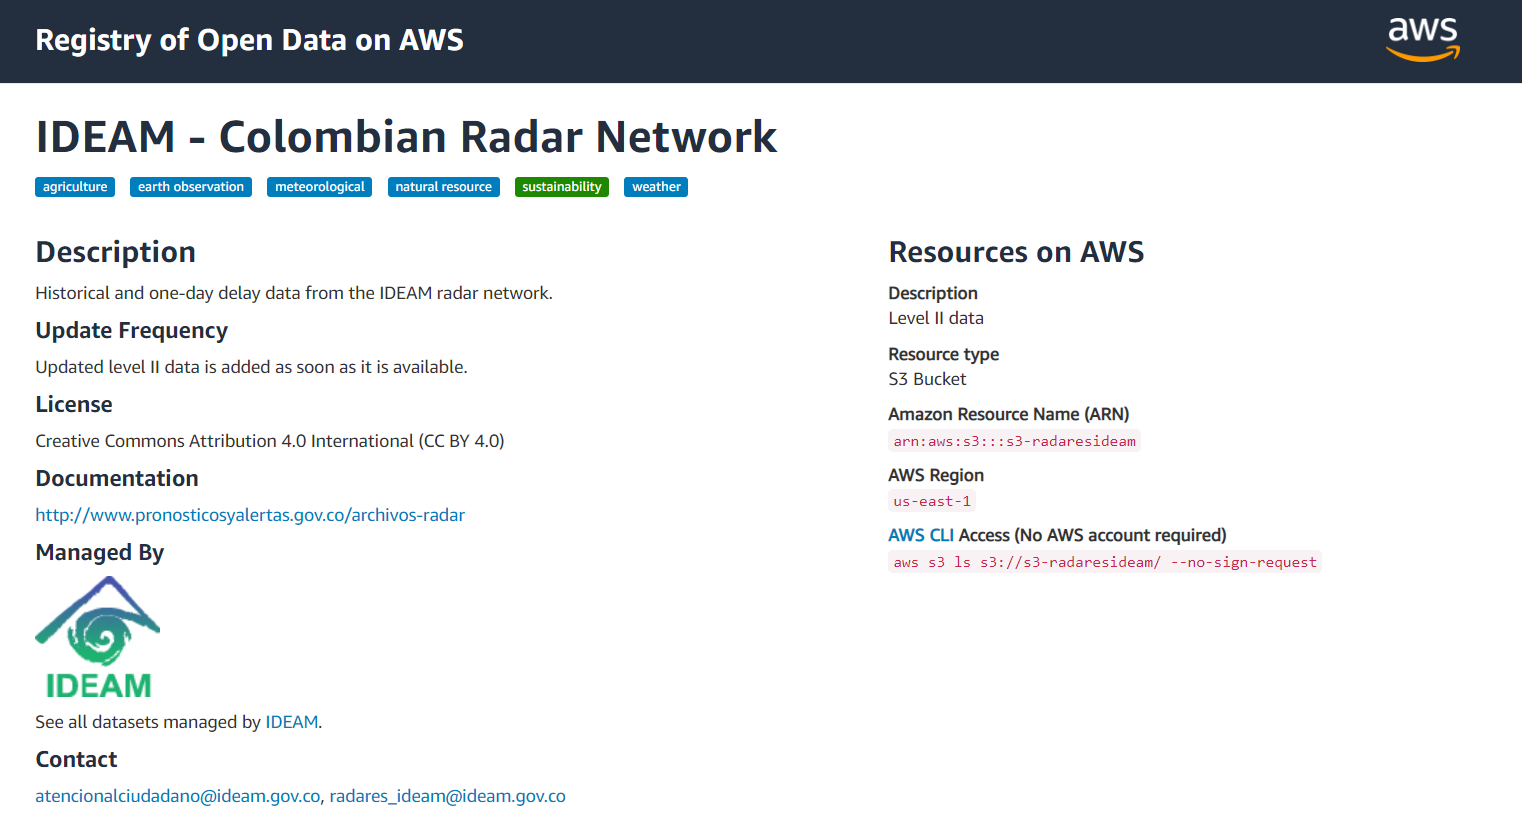 -->

<div>
<center>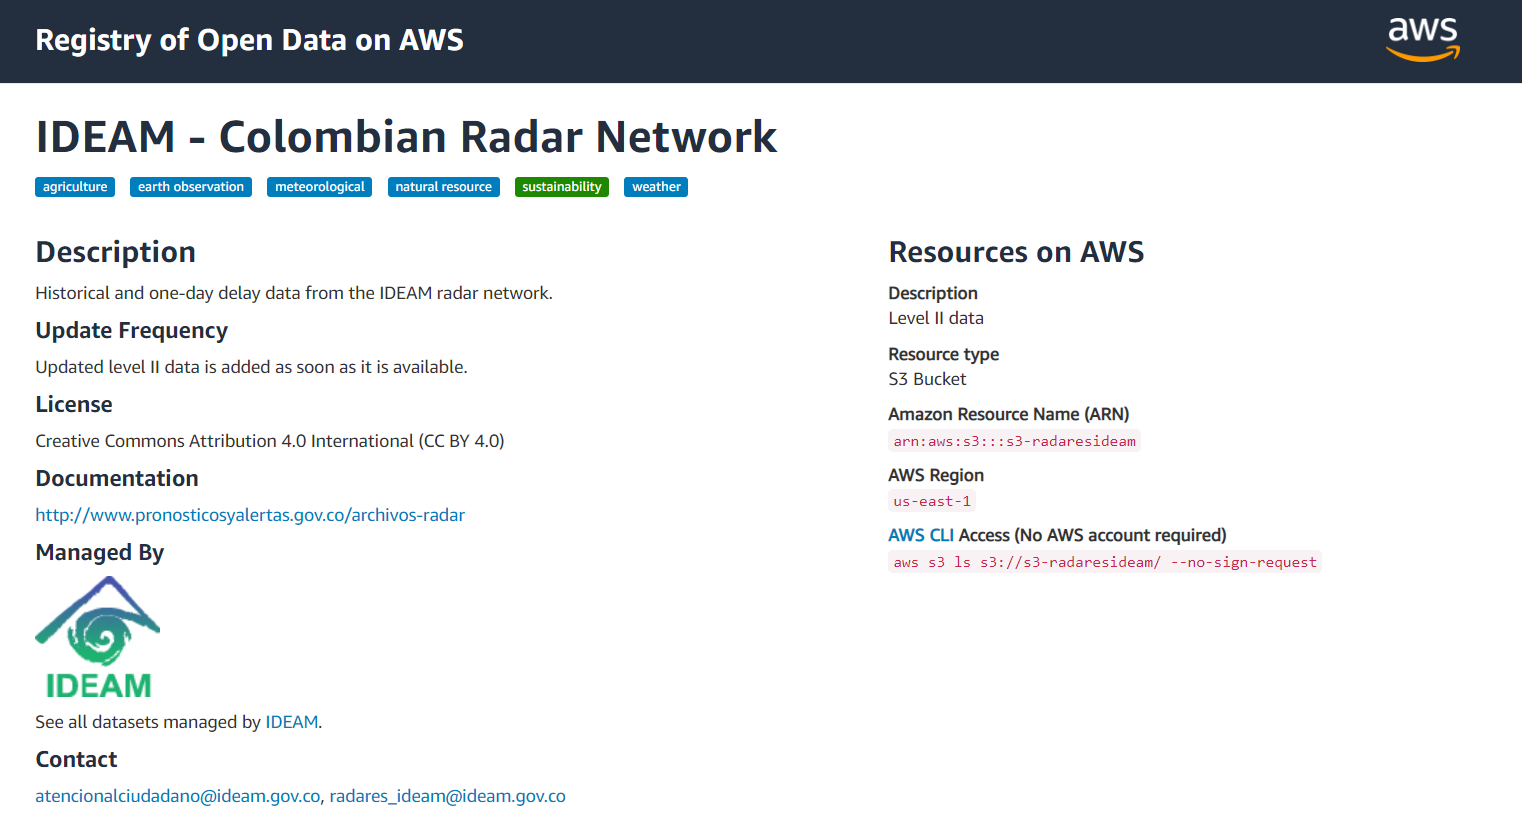</center>
</div>

## Usando el comando aws Client 


In [ ]:
!aws s3 ls s3://s3-radaresideam/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Guaviare/ --no-sign-request
# !aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Barrancabermeja/ --no-sign-request

# Usando Python

## Librerias

In [ ]:
import boto3
import botocore
from botocore.client import Config
import warnings
import pyart
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Conexión bucket (repositorio de AWS)

In [ ]:
s3 = boto3.resource('s3', config=Config(signature_version=botocore.UNSIGNED, \
                                    user_agent_extra='Resource'))
bucket = s3.Bucket('s3-radaresideam')\

bucket

## Crear consulta acorde a la estructura del bucket

#### /Año/Mes/Dia/Radar/Archivo/

In [ ]:
# objeto de fecha
d = datetime(2021, 10, 3, 12)
radar_station = 'Guaviare'

In [ ]:
# Creando una consulta tipo
prefix = f'l2_data/{d:%Y}/{d:%m}/{d:%d}/{radar_station}/{radar_station[:3].upper()}{d:%y%m%d%H}'
prefix

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Barrancabermeja/ --no-sign-request

## Archivos encontrados en el bucket

In [ ]:
objects = []

for obj in bucket.objects.filter(Prefix=prefix):
    print(obj.key)
    objects.append(obj)

#### l2_data/2021/10/03/Guaviare/GUA21100312

## Descarga los archivos encontrados en el bucket

In [ ]:
# Archivos ya fueron descargados - no ejecutar
for obj in objects:
    _, filename = os.path.split(obj.key)
    path_save = f'./data/{filename}'
    bucket.download_file(obj.key, path_save)


In [ ]:
%%bash
ls -ltrh data

# Graficos Usando PyArt


<!-- 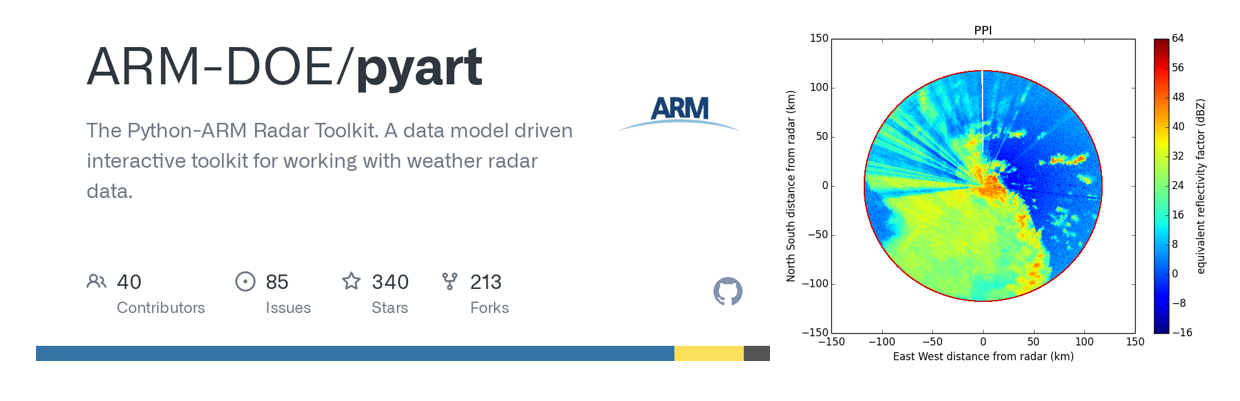 -->

<div>
<center>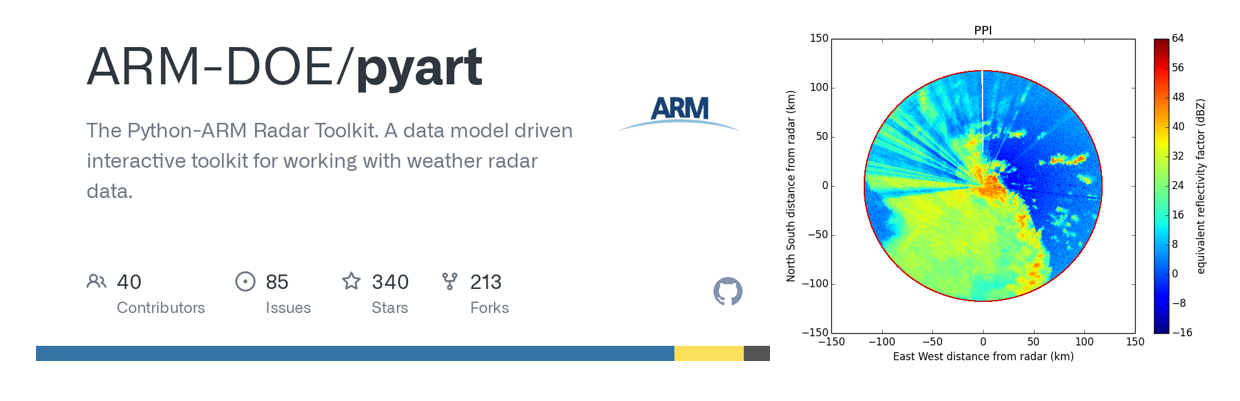</center>
</div>

## https://github.com/ARM-DOE/pyart

In [ ]:
%%html
<iframe src="https://arm-doe.github.io/pyart/source/auto_examples/index.html#mapping-examples" width="1500" height="800"></iframe>

### Objeto "radar" usando pyart.io.read

In [ ]:
list_files = glob.glob(f'data/{radar_station[:3].upper()}*')
list_files[0]

In [ ]:
radar = pyart.io.read(list_files[0])

### Información contenida dentro del archivo

In [ ]:
radar.info('compact')

### Variables polarimétricas

In [ ]:
radar.fields.keys()

### Parámetros asociados a la operacion del radar

In [ ]:
radar.instrument_parameters.keys()

### Metadata asociada al archivo

In [ ]:
radar.metadata.keys()

### Plot usando pyart.io.graph

In [ ]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, vmin=0, vmax=70, cmap='pyart_NWSRef')
display.plot_cross_hair(5.)
display.plot_range_ring(radar.range['data'][-1]/1000)
plt.show()

### Plots generados en IDEAM

<!-- 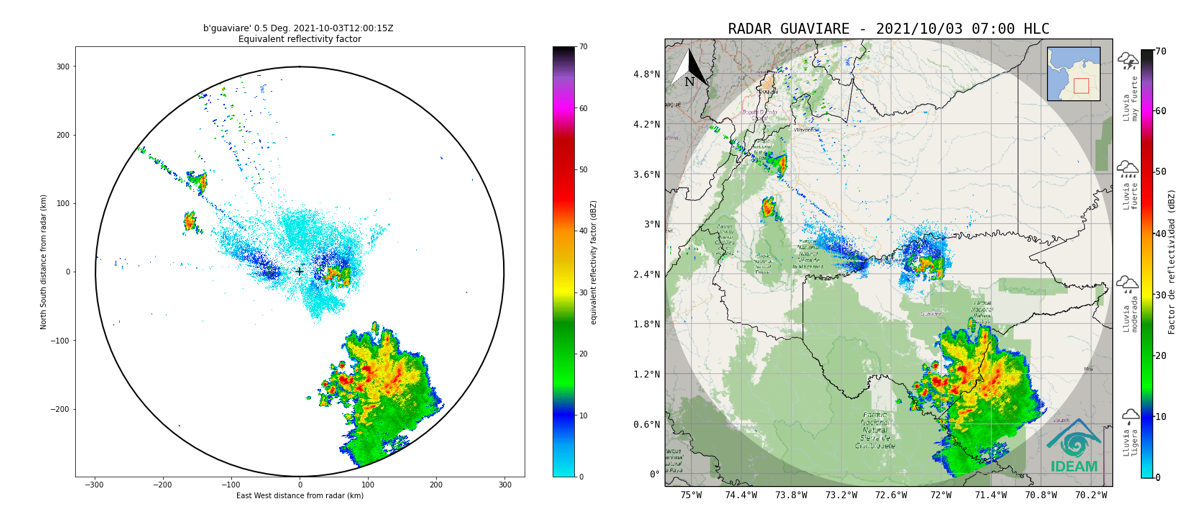 -->
<div>
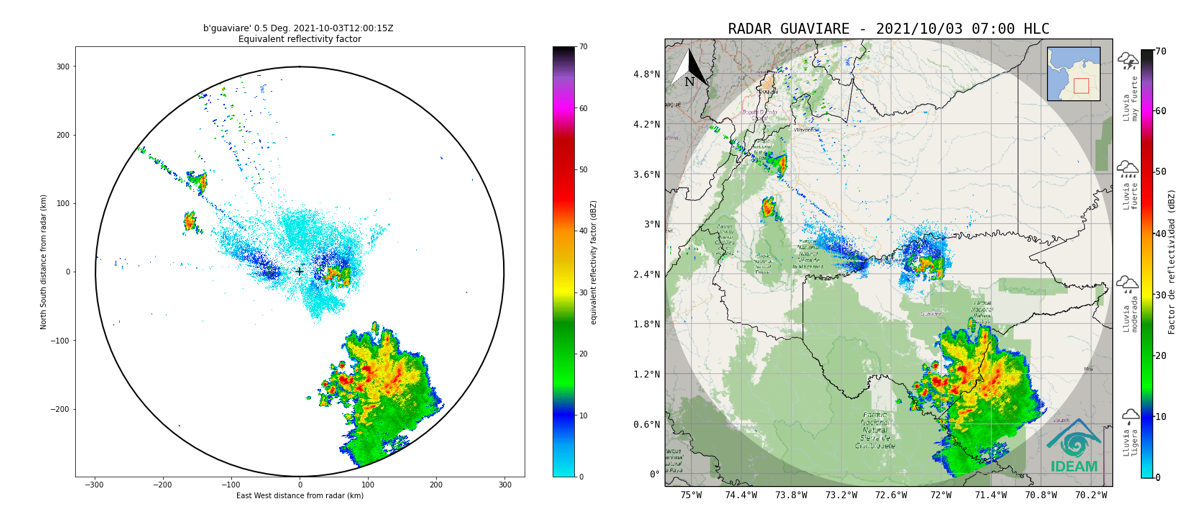
</div>

### Plot de variables polarimétricas

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(13, 10))
vpol = ['reflectivity', 'differential_reflectivity', 'cross_correlation_ratio', 'velocity']
for i, ax  in enumerate(ax.flat):
    display.plot(vpol[i], ax=ax, title_flag=False)

In [ ]:

%%html
<iframe src="https://arm-doe.github.io/pyart/_modules/pyart/graph/radardisplay.html#RadarDisplay.plot" width="1500" height="500"></iframe>


## Algunas appliaciones usando la información de los radares meteorológicos